In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '..')
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 16
import numpy as np
import seaborn as sns

import covid19

## data

In [3]:
data_italy_regions_path = 'dpc-covid19-ita-regioni.csv'
data_italy_regions_path = covid19.data.download('regioni')

In [4]:
ds_italy_regions = covid19.data.read_dpc(data_italy_regions_path)

ds_italy_regions

<xarray.Dataset>
Dimensions:            (location: 21, time: 93)
Coordinates:
  * time               (time) datetime64[ns] 2020-02-24 ... 2020-05-26
  * location           (location) <U29 'Italy / Abruzzo' ... 'Italy / Veneto'
    lat                (location) float64 42.35 40.64 38.91 ... 45.74 45.43
    lon                (location) float64 13.4 15.81 16.59 ... 12.39 7.32 12.34
    country            (location) <U5 'Italy' 'Italy' ... 'Italy' 'Italy'
    state_region       (location) <U29 'Italy / Abruzzo' ... 'Italy / Veneto'
Data variables:
    current_severe     (time, location) int64 0 0 0 0 10 0 ... 83 145 12 17 177
    current_critical   (time, location) int64 0 0 0 0 2 0 1 ... 2 10 34 2 1 11
    deaths             (time, location) int64 0 0 0 0 0 ... 271 1021 75 143 1886
    current_confirmed  (time, location) int64 0 0 0 0 18 ... 1522 42 31 2431
    confirmed          (time, location) int64 0 0 0 0 ... 10070 1431 1181 19105
    tests              (time, location) int64 5 0 1 10 ... 65013 14262 602252
    tested             (time, location) float64 0.0 0.0 ... 1.119e+04 3.126e+05
    dimessi_guariti    (time, location) int64 0 0 0 0 0 ... 7527 1314 1007 14788
    population         (location) int64 1322247 570365 ... 126883 4907529

In [5]:
REGIONS = list(reversed(ds_italy_regions.isel(time=-1).sortby('deaths').location.values.tolist()))
print(REGIONS)

['Italy / Lombardia', 'Italy / Emilia-Romagna', 'Italy / Piemonte', 'Italy / Veneto', 'Italy / Liguria', 'Italy / Toscana', 'Italy / Marche', 'Italy / Lazio', 'Italy / Puglia', 'Italy / P.A. Trento', 'Italy / Campania', 'Italy / Abruzzo', 'Italy / Friuli Venezia Giulia', 'Italy / P.A. Bolzano', 'Italy / Sicilia', "Italy / Valle d'Aosta", 'Italy / Sardegna', 'Italy / Calabria', 'Italy / Umbria', 'Italy / Basilicata', 'Italy / Molise']


In [6]:
DAY = np.timedelta64(24 * 60 * 60, 's')
PALETTE_ONE = list(sns.color_palette())

SHOWUNTIL = np.datetime64(ds_italy_regions.time[-1].values, 's') + 3 * DAY

EXTENT = ('2020-02-23', SHOWUNTIL)
XLIM = tuple(map(np.datetime64, EXTENT))

In [7]:
REGIONS_FIT_PARAMS = {
    'Lombardia': {
        'current_severe': [None, '2020-03-07', '2020-03-08', '2020-03-18'],
        'current_critical': 0,
        'deaths': 4,
    },
    'Emilia-Romagna': {
        'current_severe': [None, '2020-03-06', '2020-03-21'],
        'current_critical': 0,
        'deaths': [None, '2020-03-23'],
    },
    'Piemonte': {
        'current_severe': [None, '2020-03-20', '2020-03-21'],
        'current_critical': 0,
        'deaths': 4,
    },
    'Veneto': {
        'current_severe': [None, '2020-03-13', '2020-03-14', '2020-03-24'],
        'current_critical': 0,
        'deaths': 4,
    },
    'Marche': {
        'current_severe': [None, '2020-03-16', '2020-03-21'],
        'current_critical': 0,
        'deaths': 4,
    },
    'Liguria': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'deaths': 4,
    },
    'Toscana': {
        'current_severe': [None, '2020-03-19'],
        'current_critical': 0,
        'deaths': 4,
    },
    'Lazio': {
        'current_severe': [None, '2020-03-21', '2020-03-28'],
        'current_critical': 0,
        'deaths': 4,
    },
    'P.A. Trento': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'deaths': 4,
    },
    'Campania': {
        'current_severe': [None, '2020-03-26'],
        'current_critical': 0,
        'deaths': 4,
    },
    'Puglia': {
        'current_severe': [None, '2020-03-16', '2020-03-26'],
        'current_critical': 0,
        'deaths': 4,
    },
    'Sicilia': {
        'current_severe': [None, '2020-03-21', None],
        'current_critical': 0,
        'deaths': 4,
    },
    'Abruzzo': {
        'current_severe': [None, '2020-03-21', None],
        'current_critical': 0,
        'deaths': 4,
    },
    'Friuli Venezia Giulia': {
        'current_severe': [None, '2020-03-16', '2020-03-24', None],
        'current_critical': 0,
        'deaths': ['2020-03-20', '2020-03-31', None],
    },
    'P.A. Bolzano': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'deaths': 4,
    },
    'Umbria': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'deaths': 4,
    },
    'Calabria': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'deaths': 4,
    },
    'Sardegna': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'deaths': 4,
    },
    'Valle d\'Aosta': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'deaths': 4,
    },
    'Basilicata': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'deaths': 4,
    },
    'Molise': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'deaths': 4,
    },
}
RATIO = {
    'current_severe': 35,
    'current_critical': 6.5,
    'deaths': 1,
}
LABEL = {
    'current_severe': 'Pazienti attualmente in reparto',
    'current_critical': 'Pazienti attualmente in terapia intensiva',
    'deaths': 'Decessi giornalieri',
}

In [8]:
STOP_FIT = '2020-04-03'

region_fits = {}
for region, params in REGIONS_FIT_PARAMS.items():
    region_fits[region] = {}
    for kind, breaks in params.items():
        if isinstance(breaks, int):
            breaks = [np.datetime64(b) + breaks * DAY if b is not None else b for b in params['current_severe']]
        region_fits[region][kind] = covid19.fit.fit_exponential_segments(ds_italy_regions.sel(location=f'Italy / {region}')[kind], breaks=breaks)

skipping start=None stop=2020-03-24T00:00:00


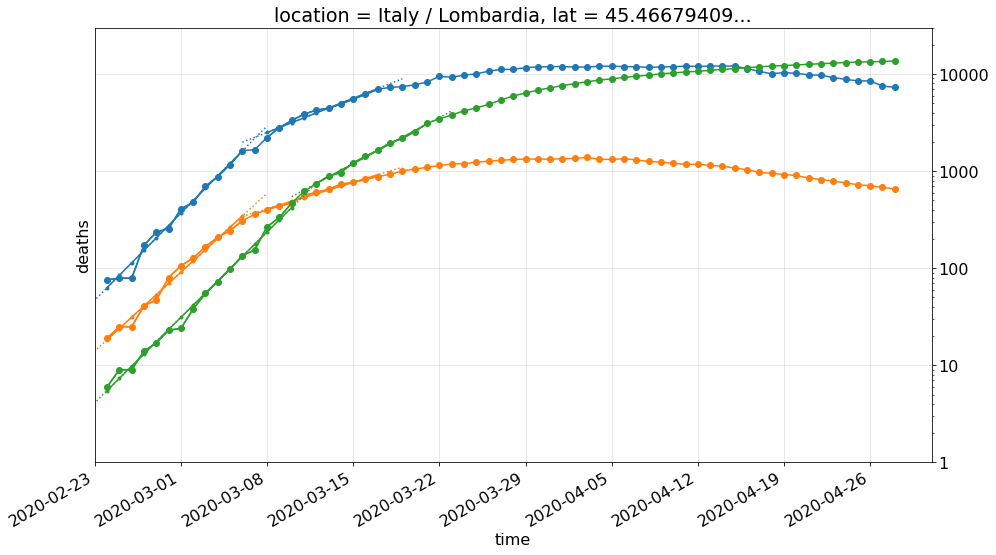

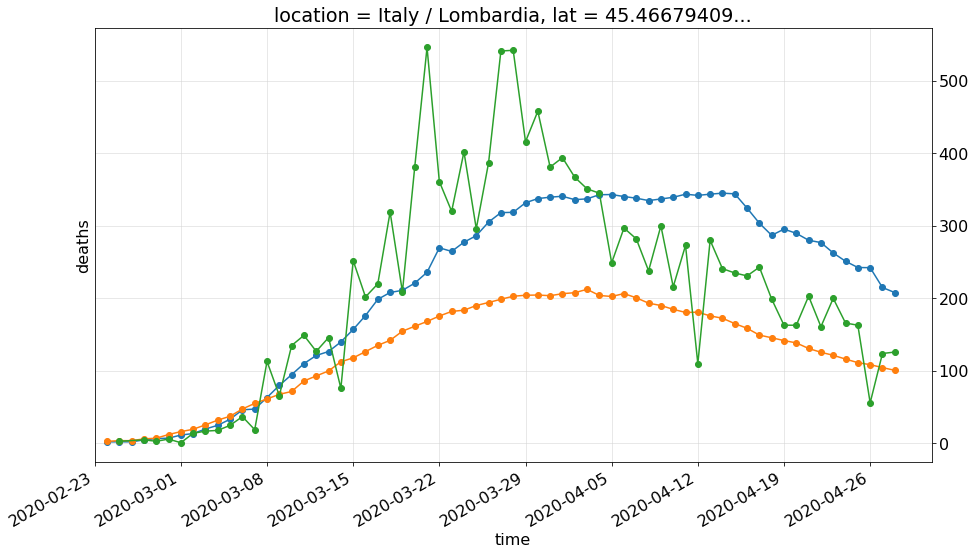

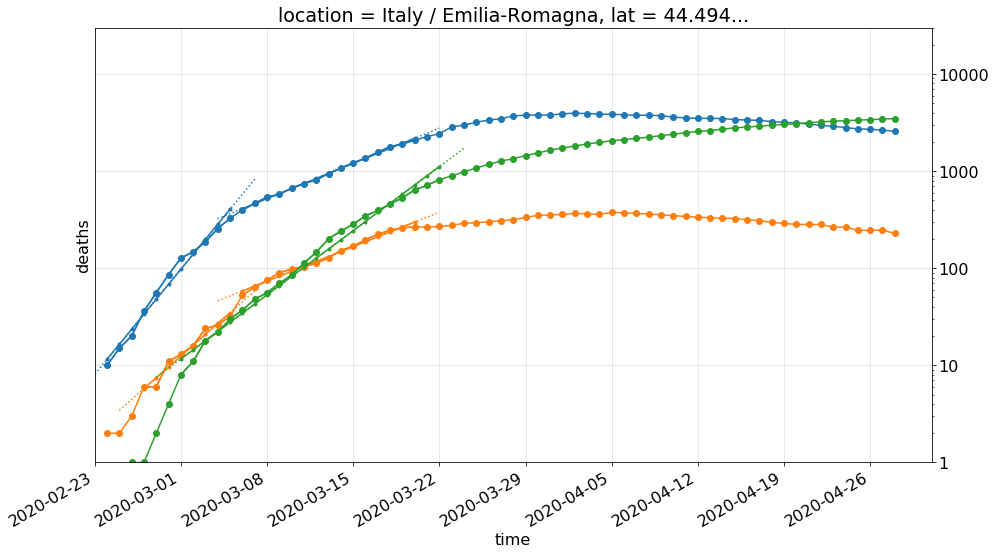

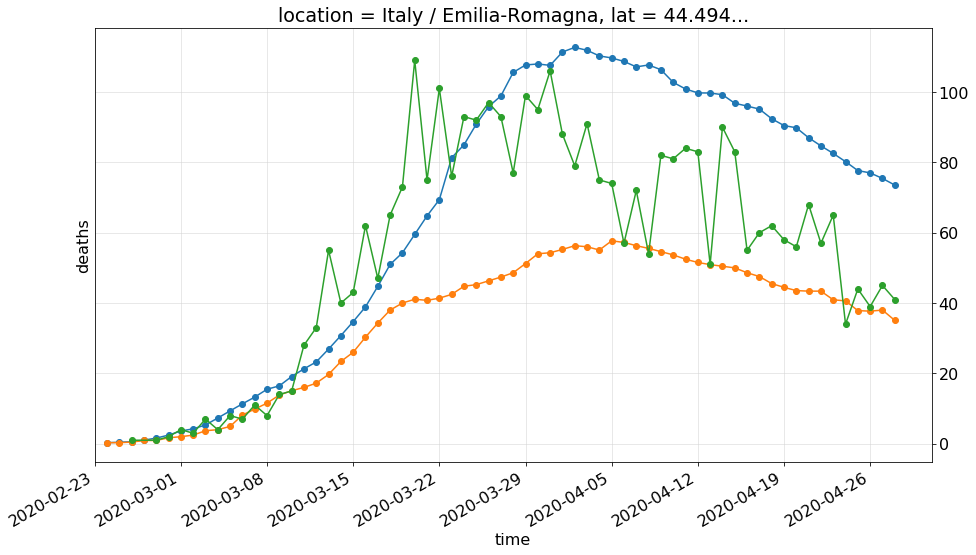

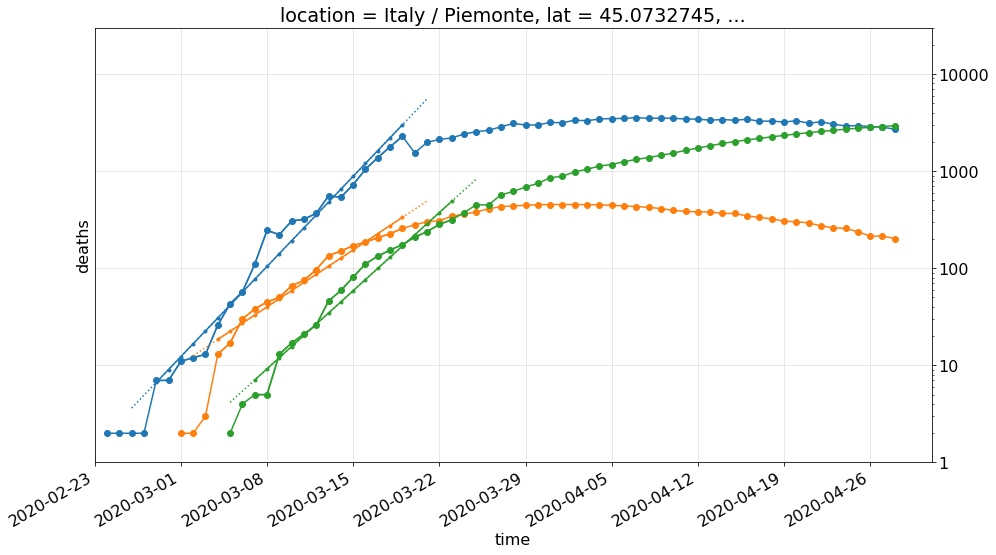

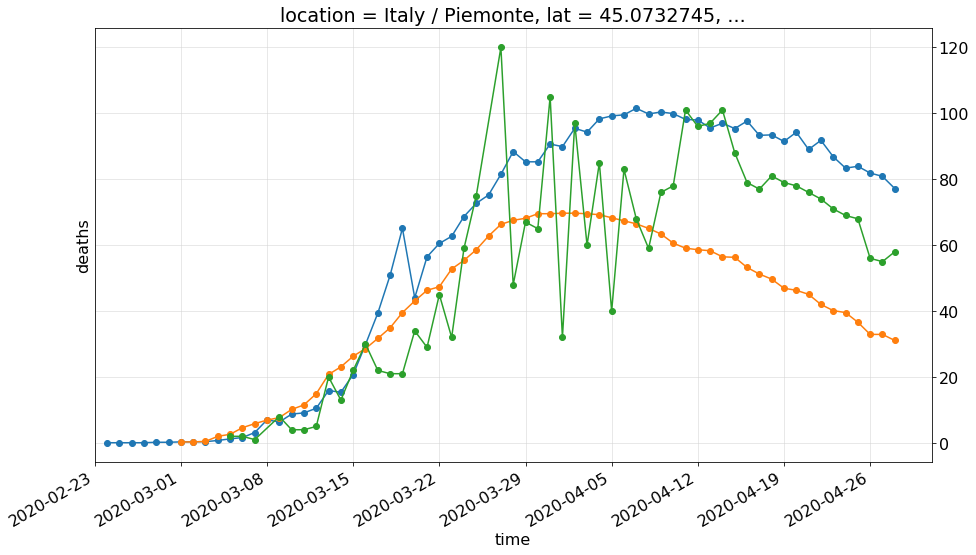

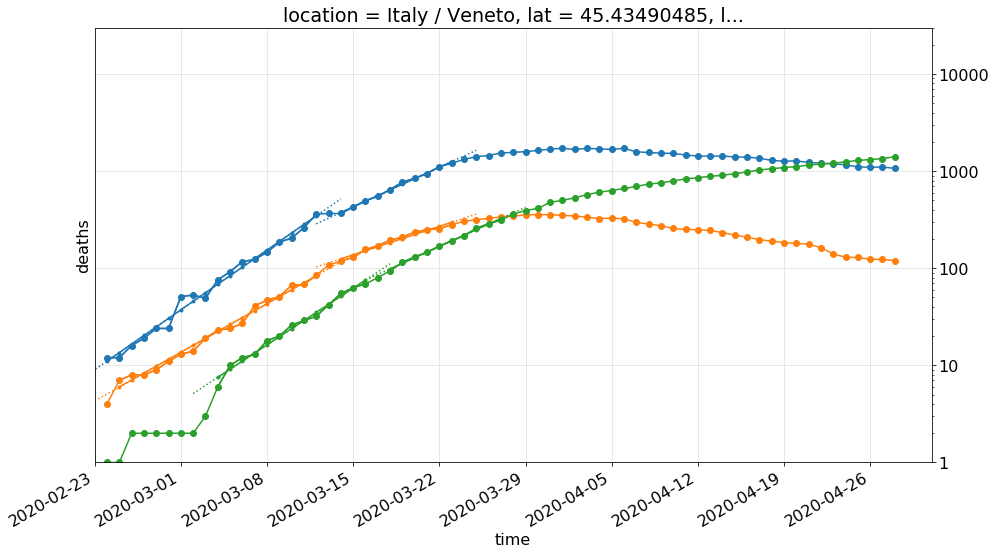

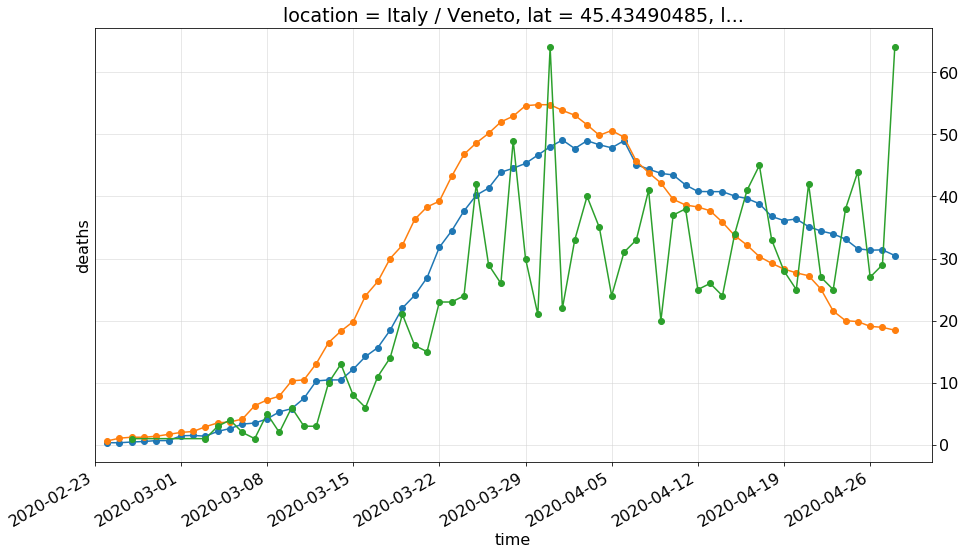

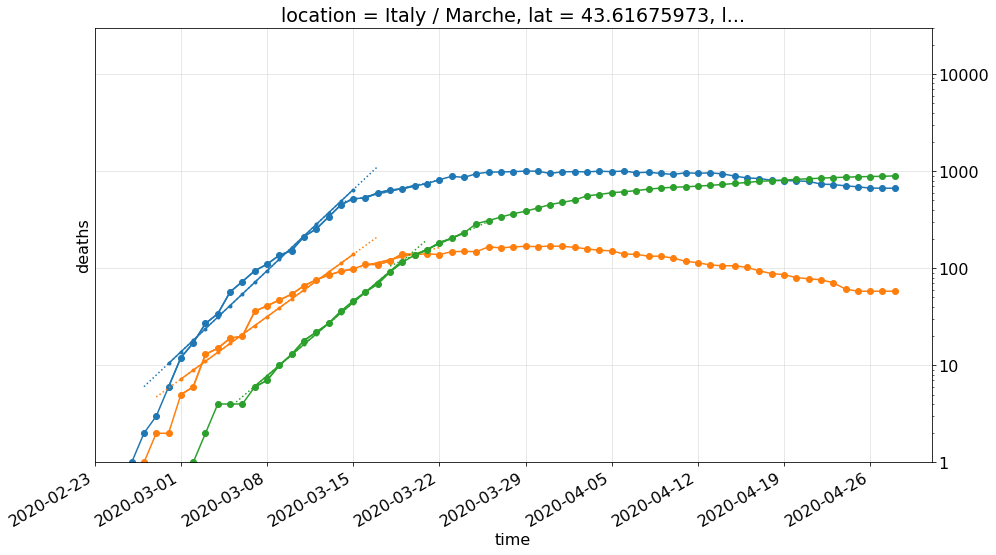

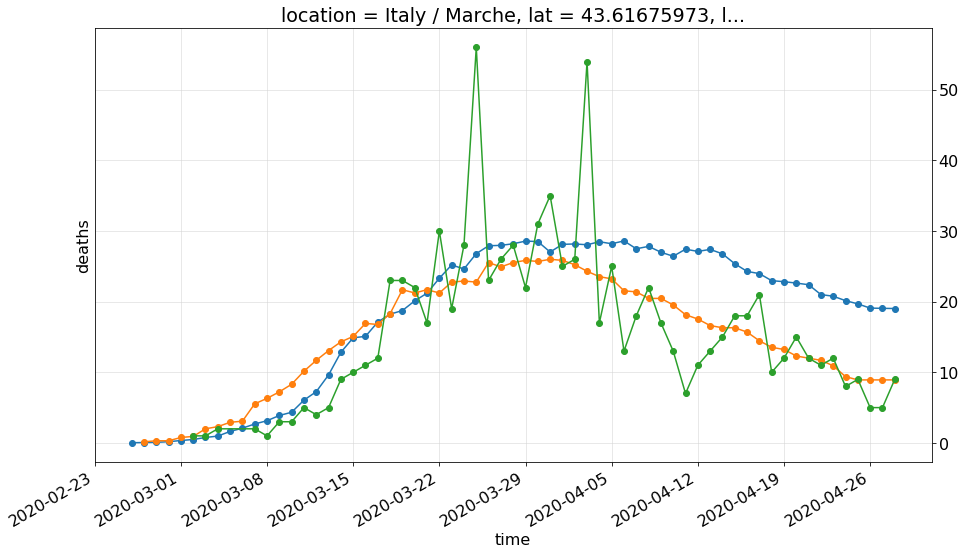

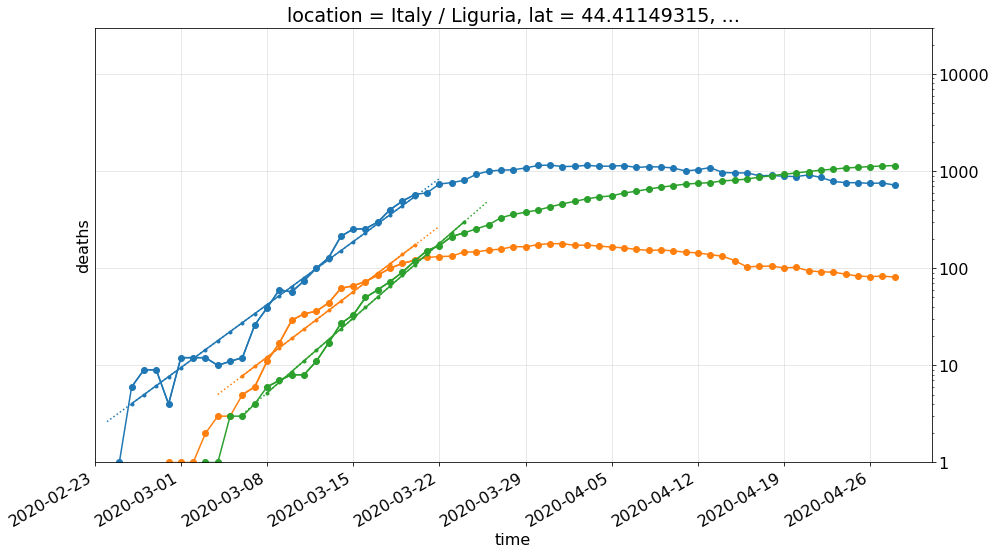

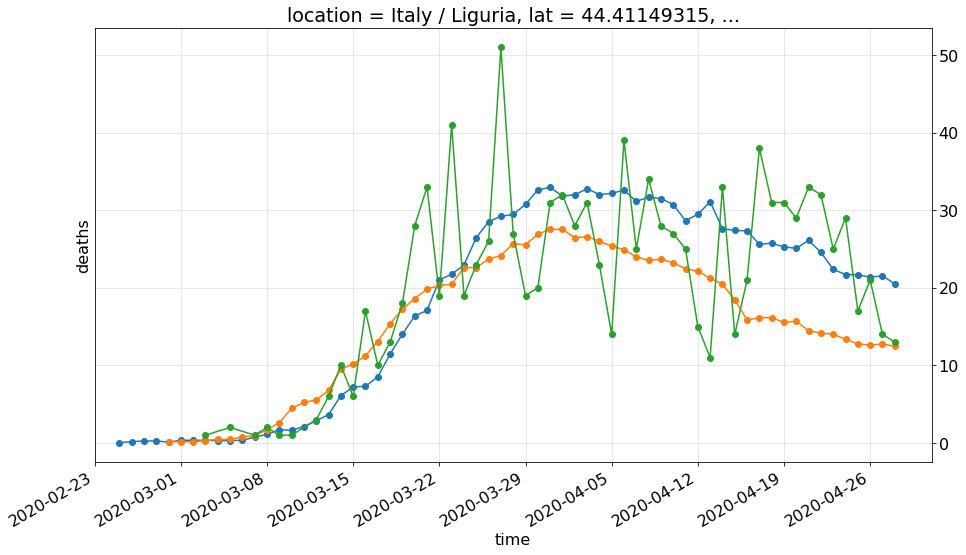

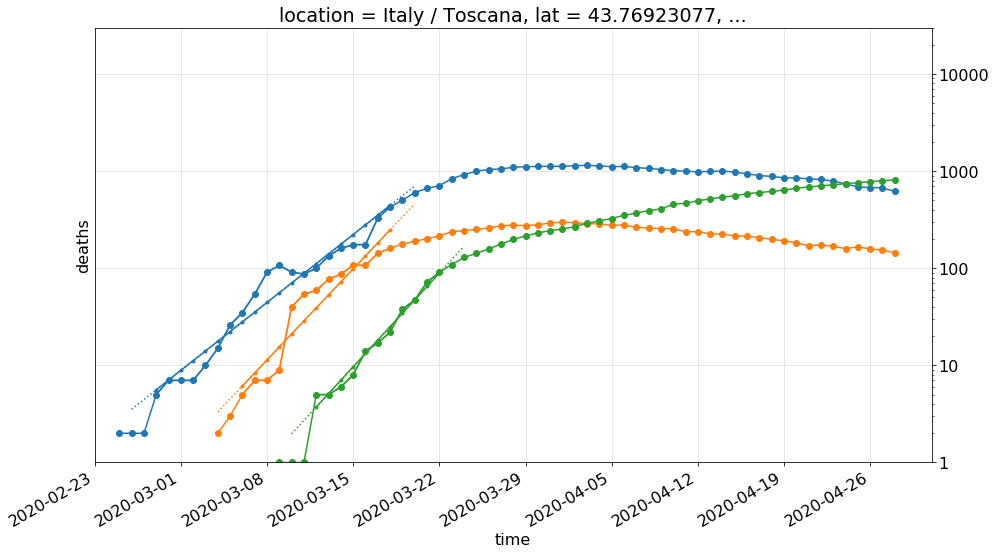

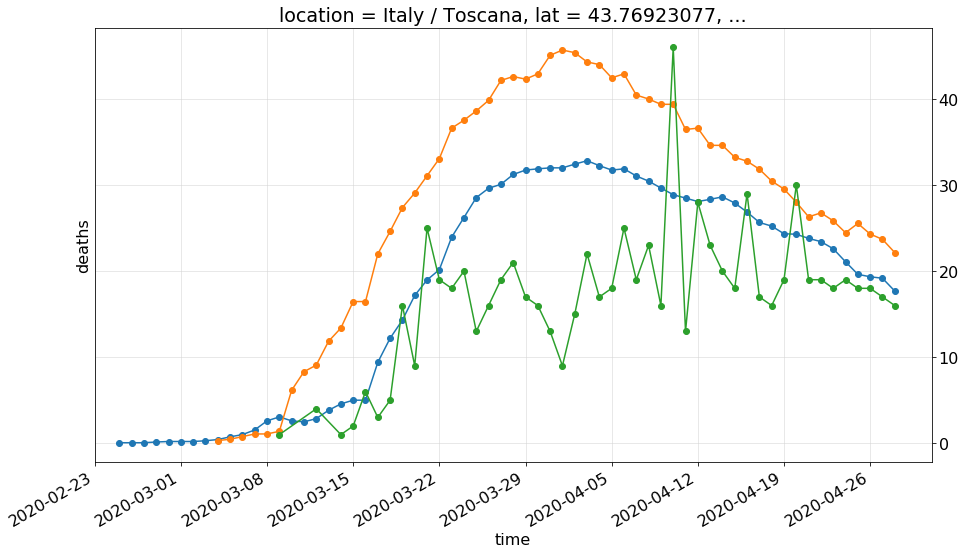

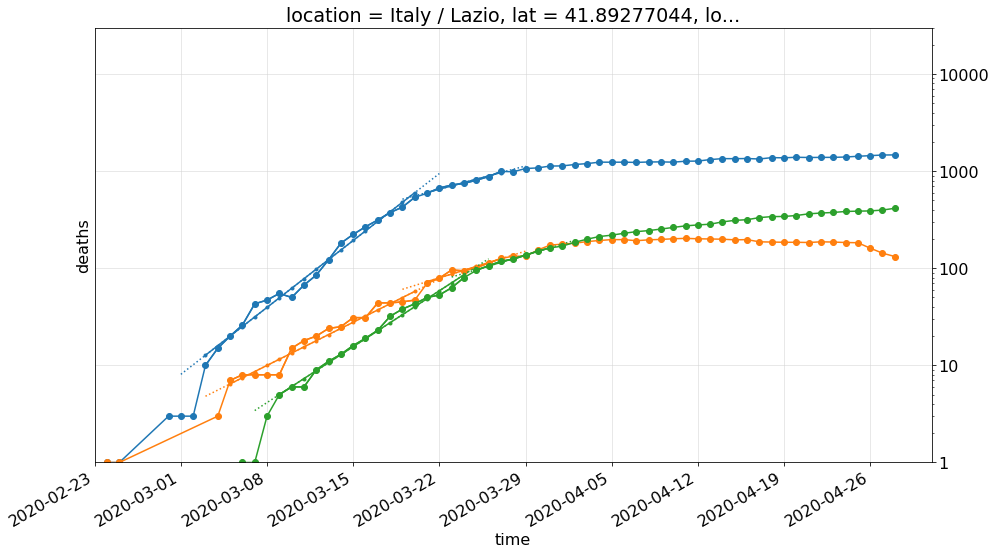

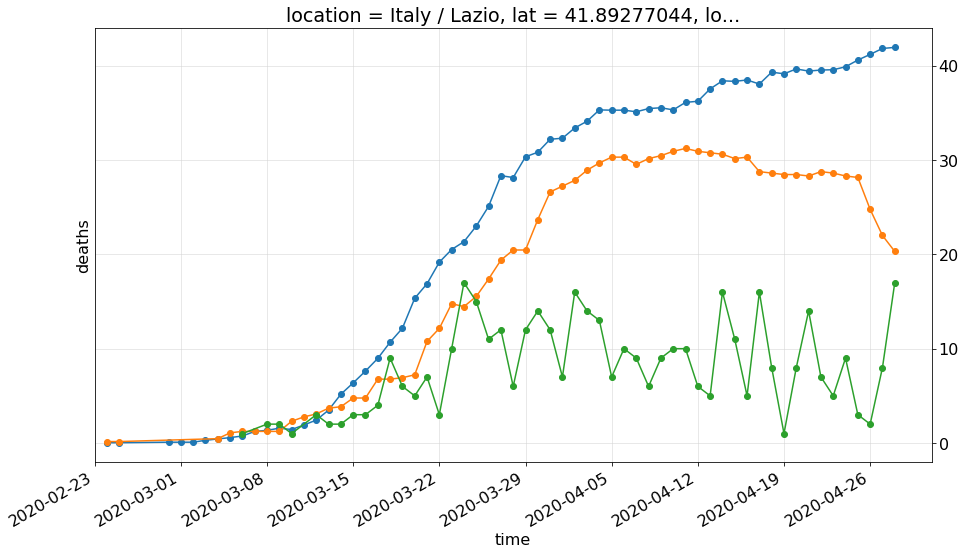

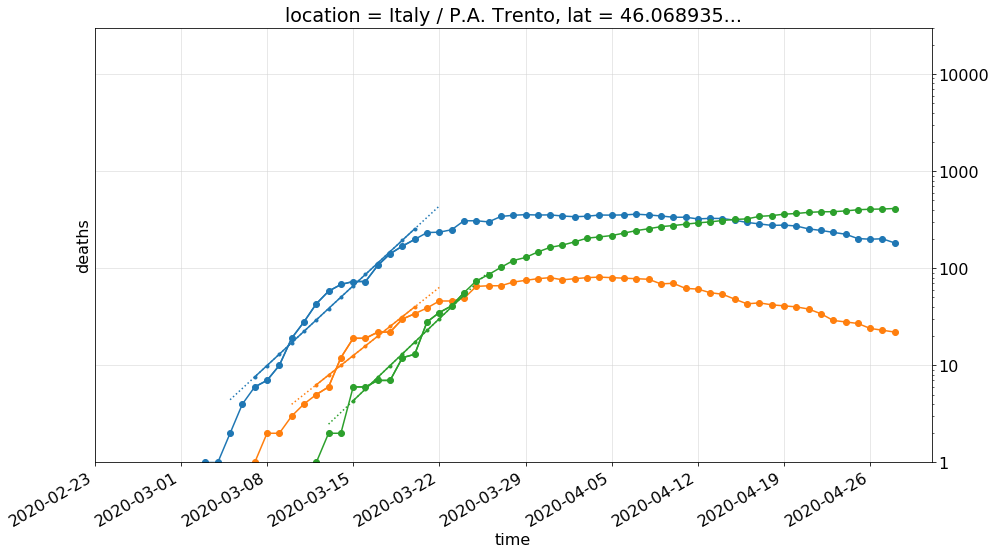

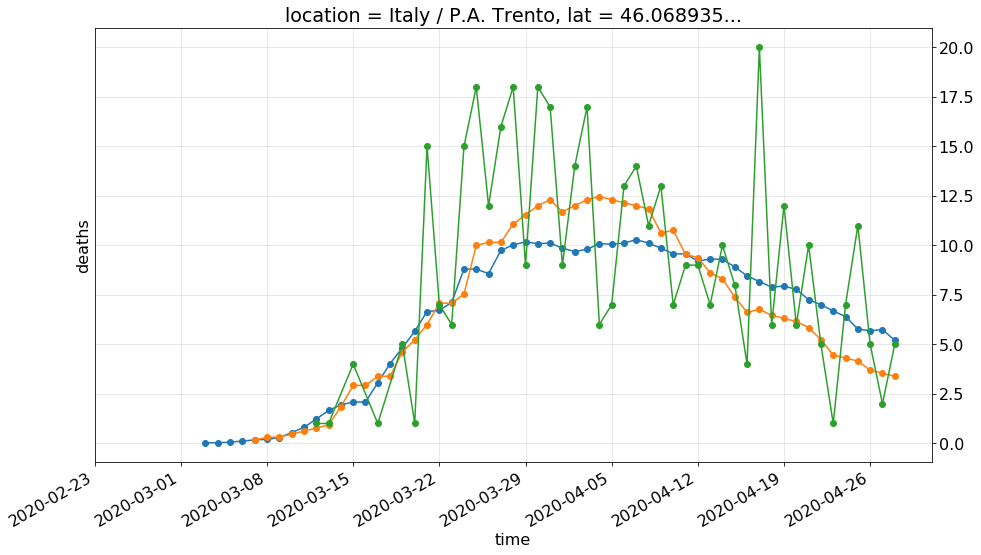

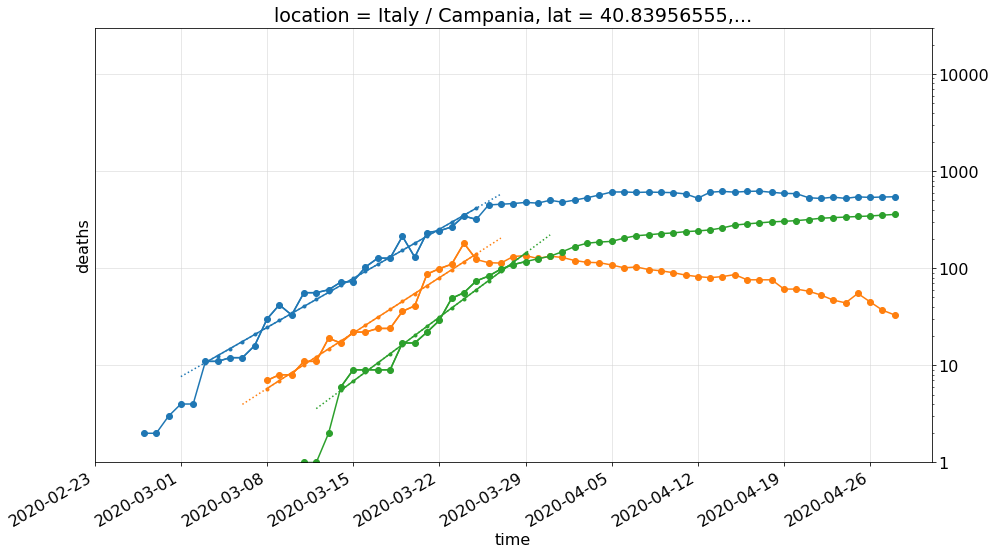

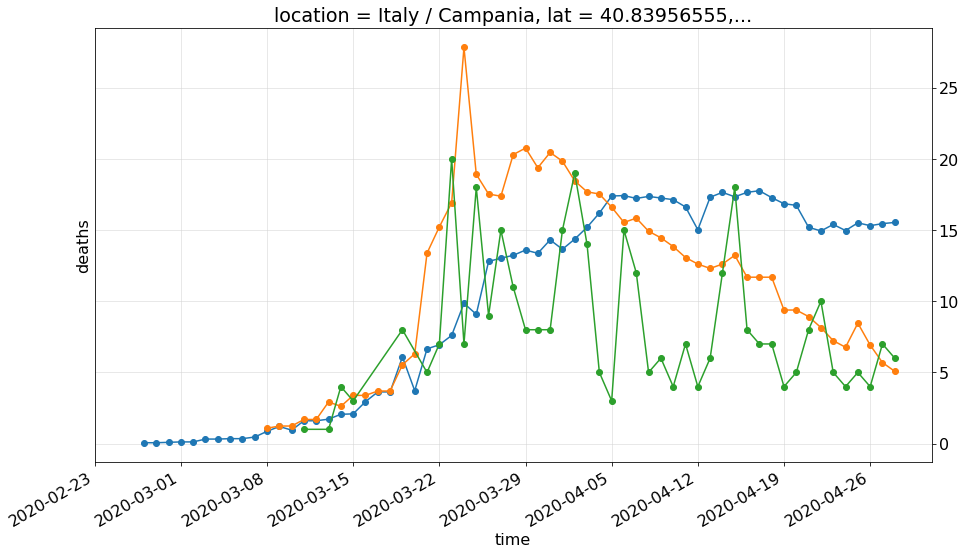

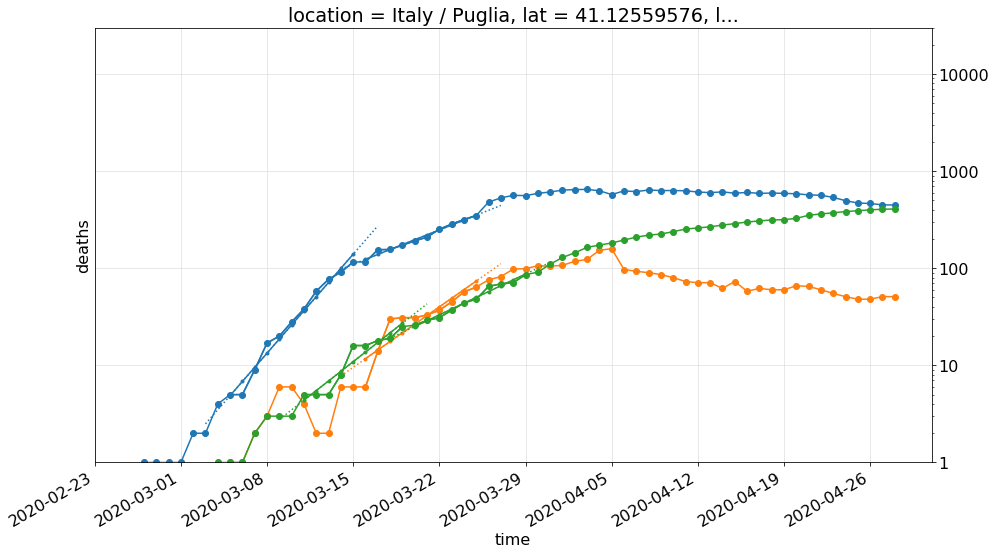

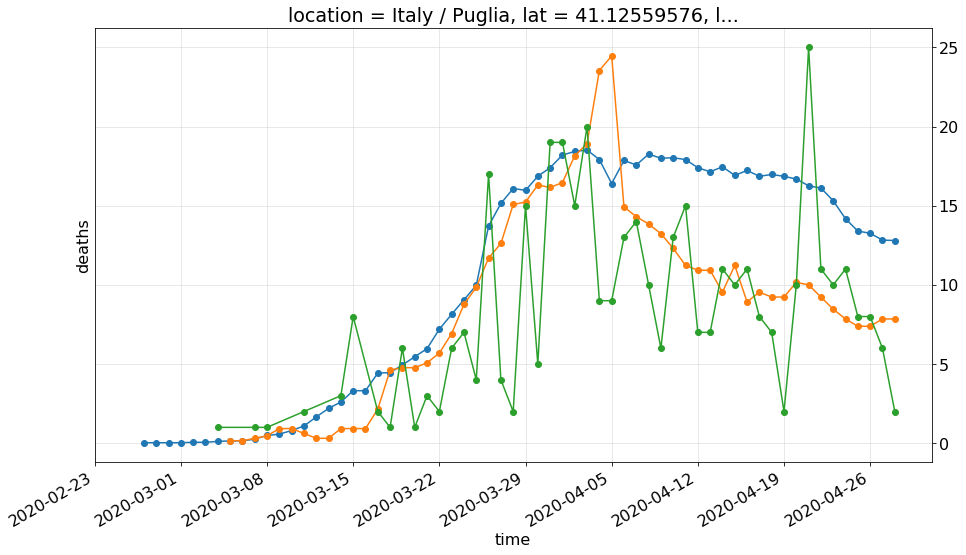

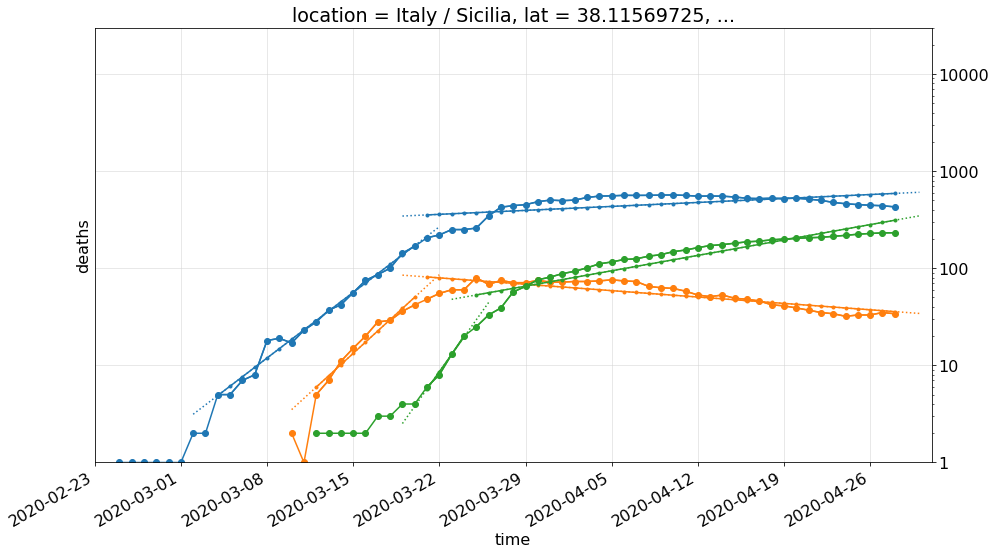

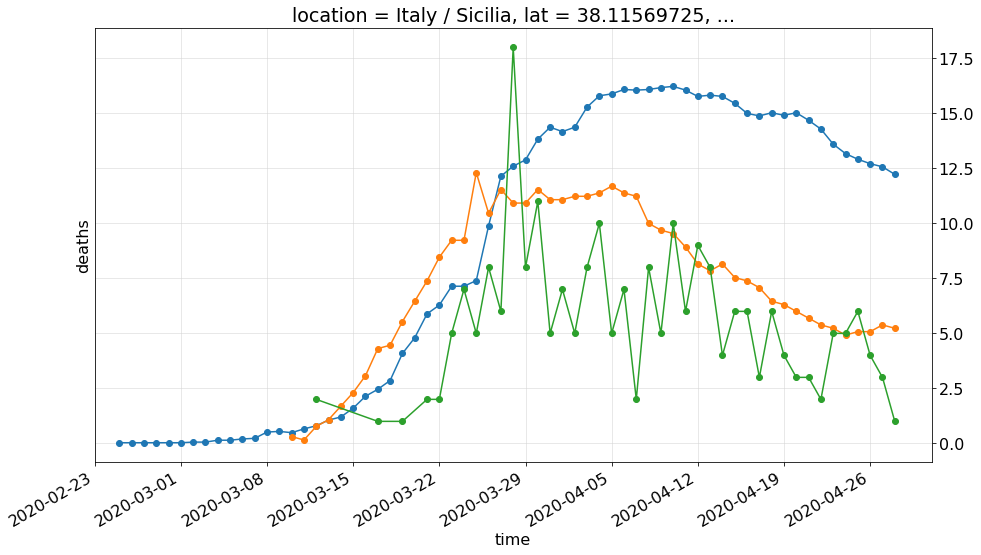

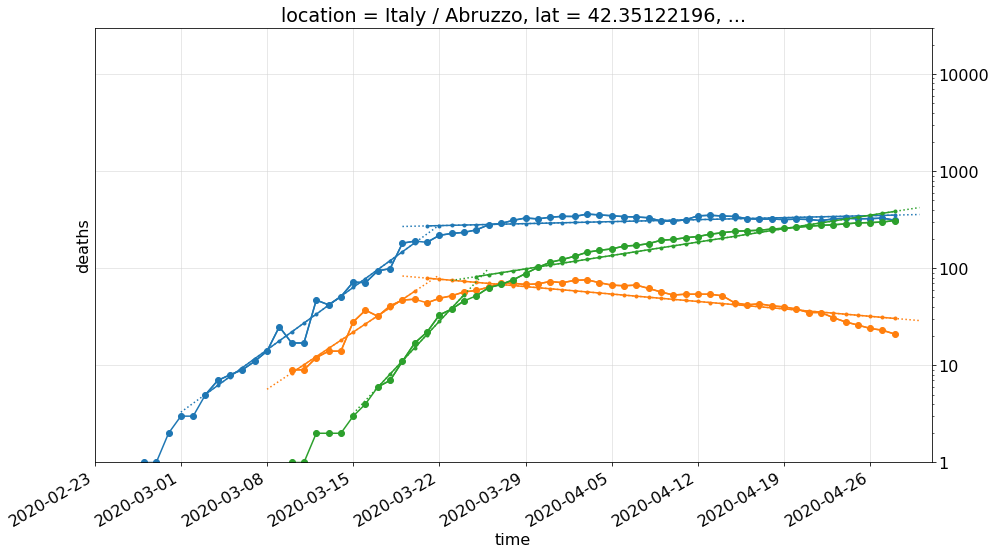

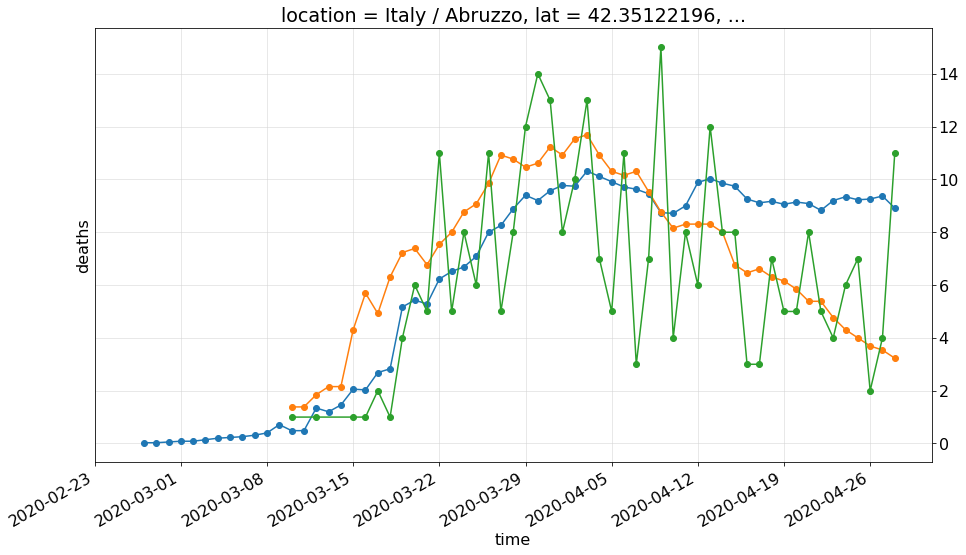

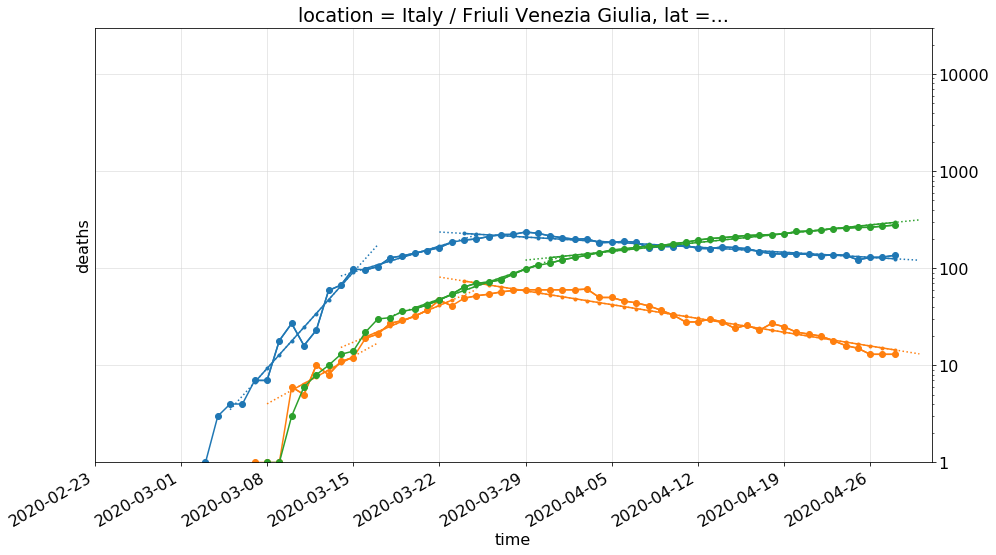

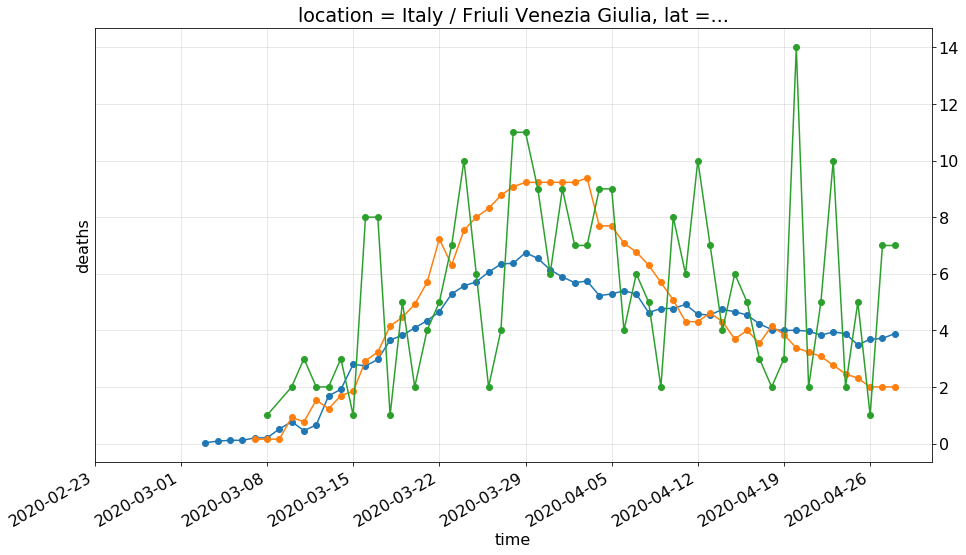

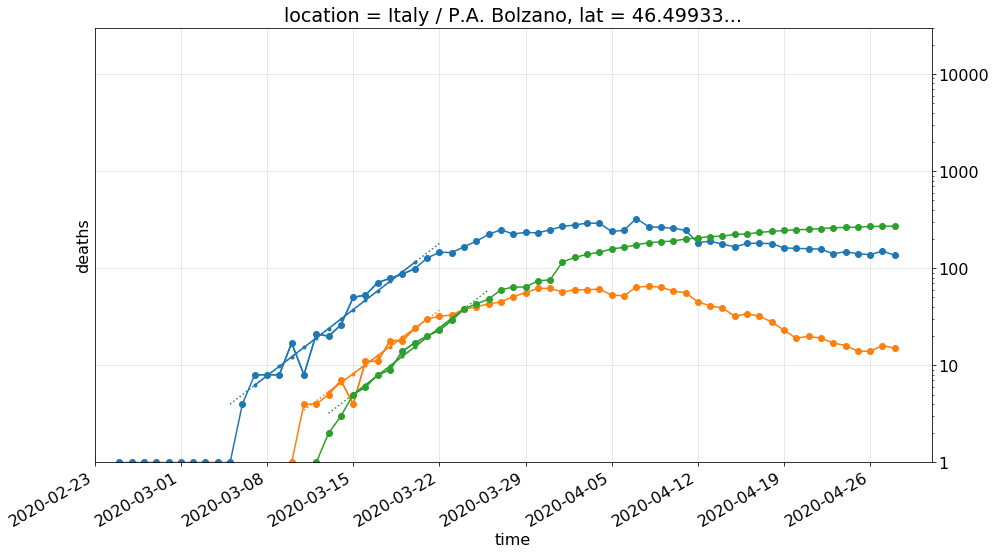

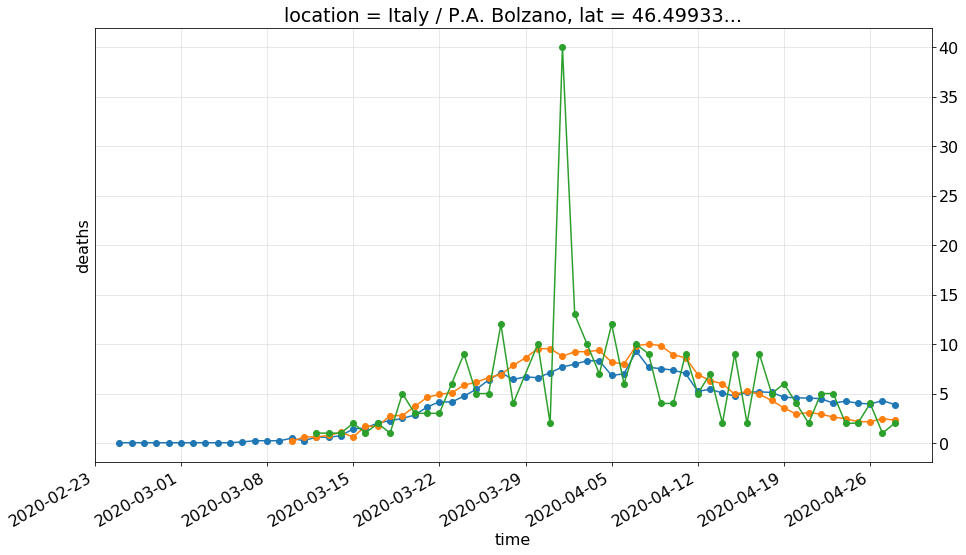

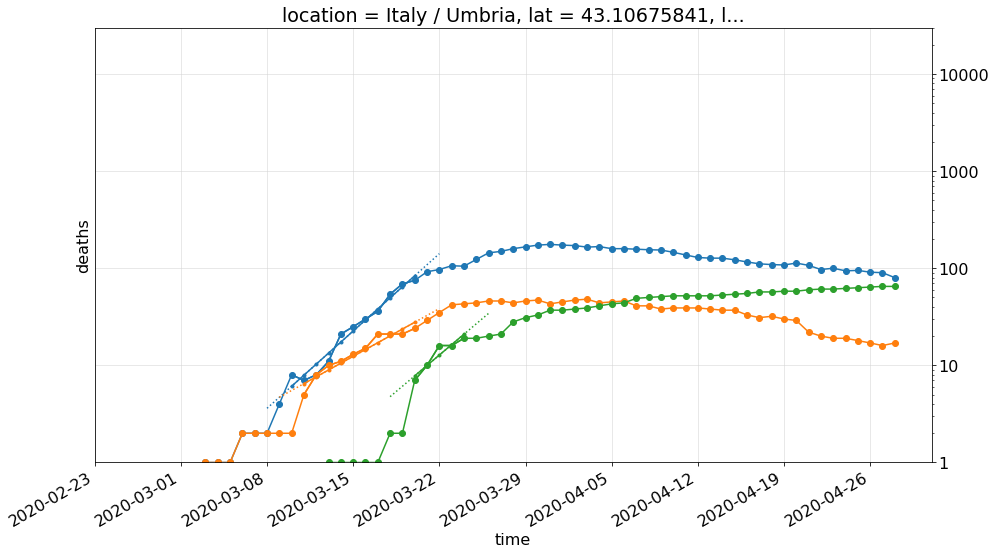

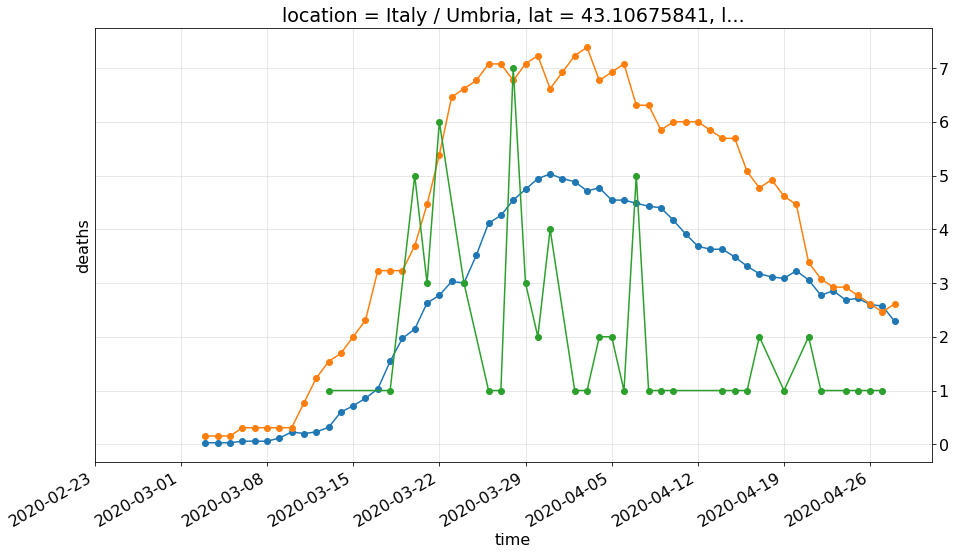

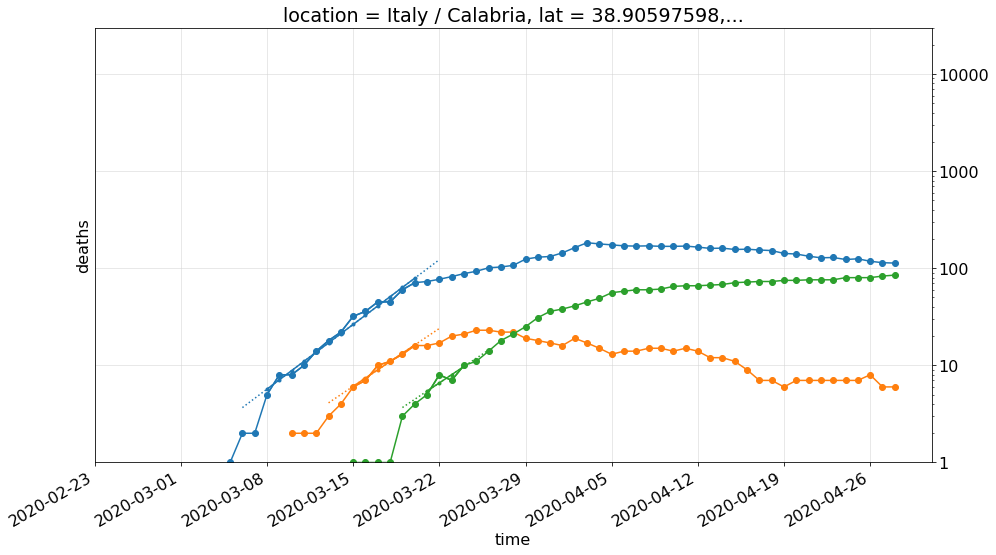

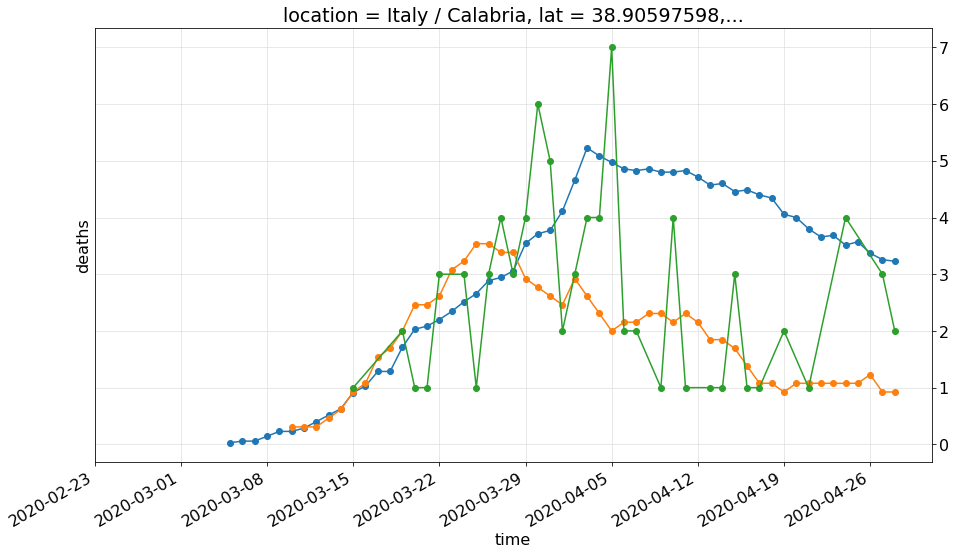

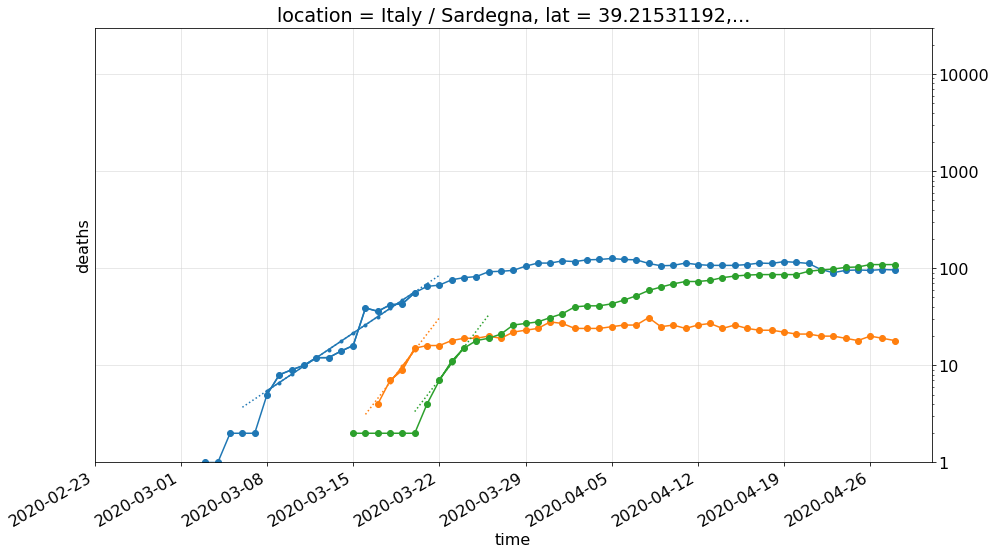

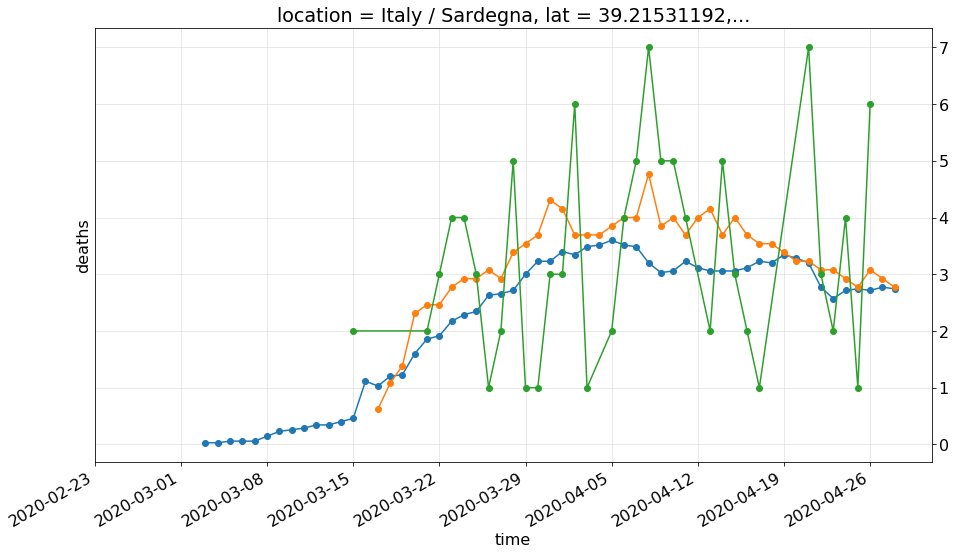

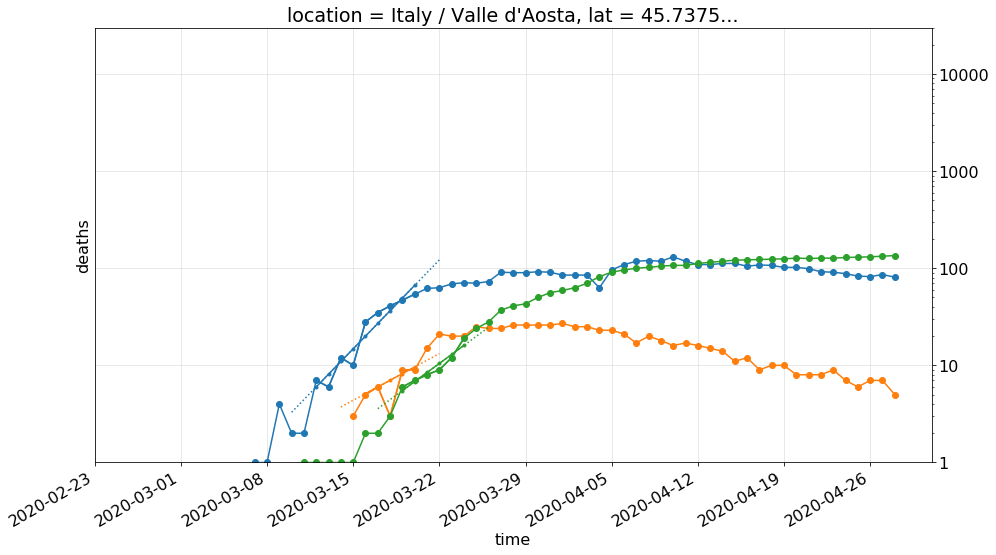

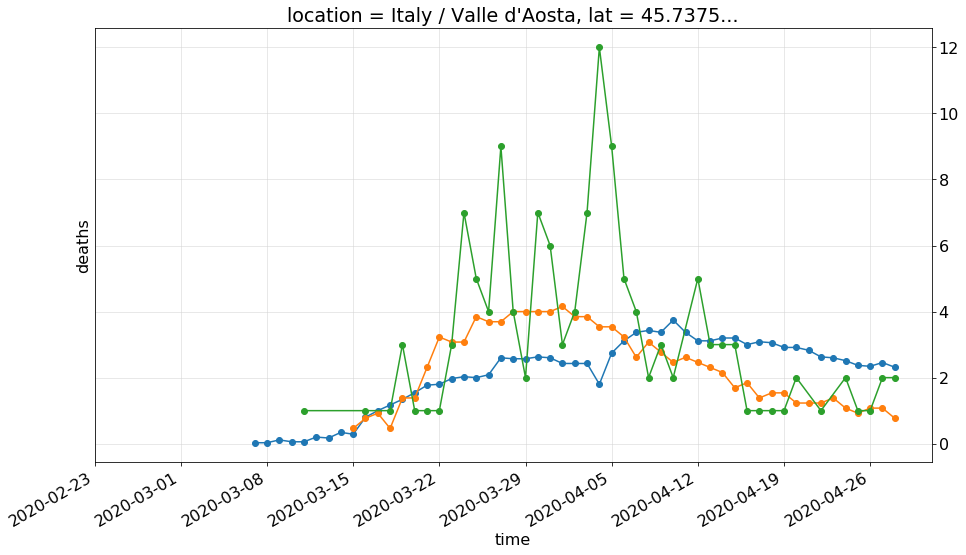

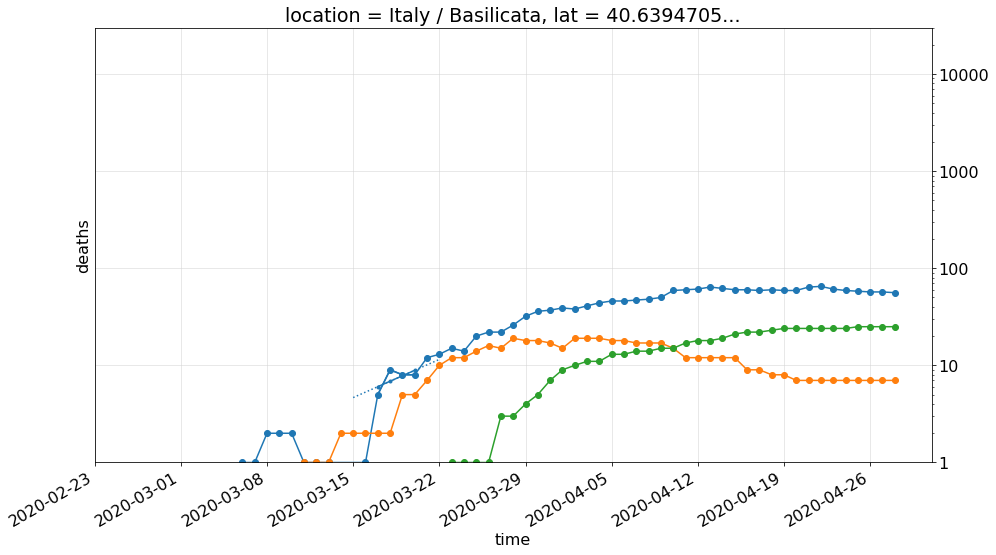

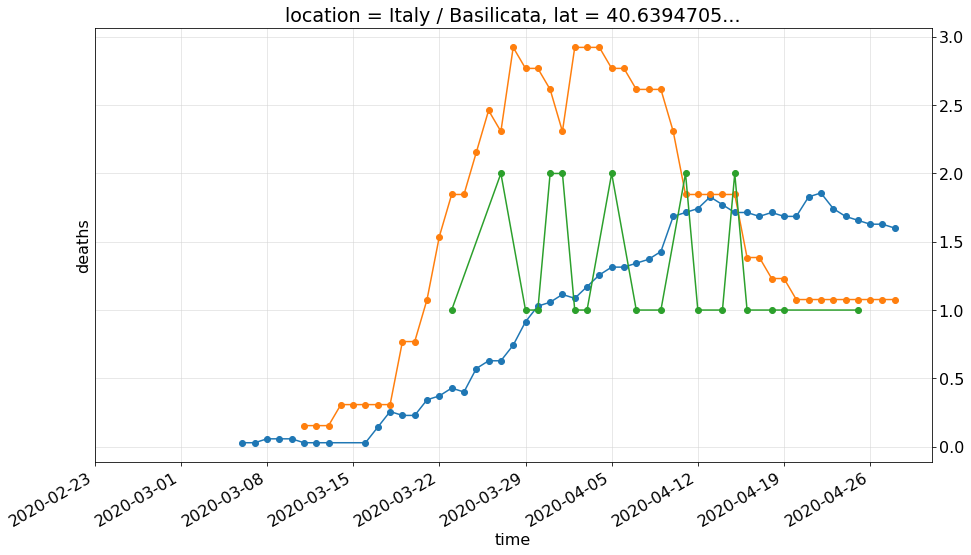

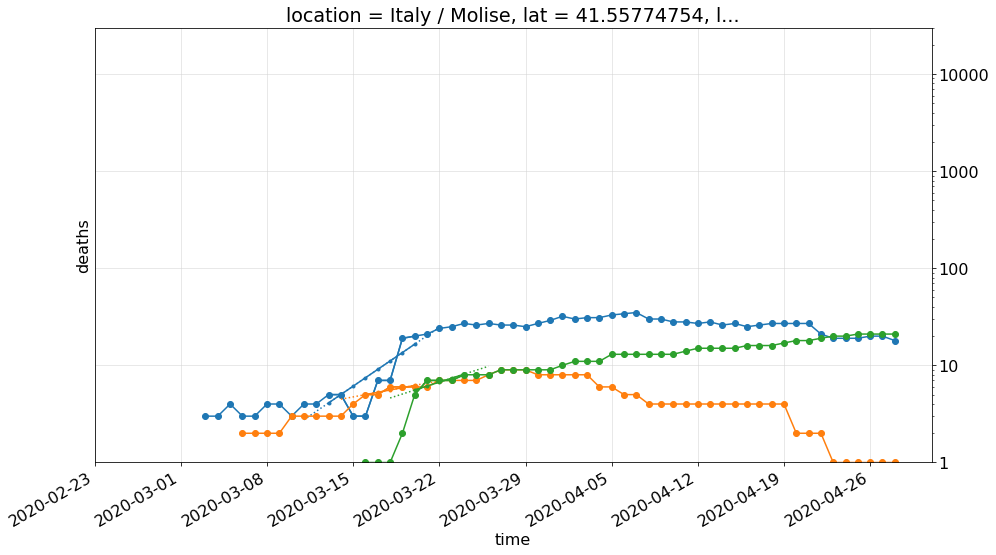

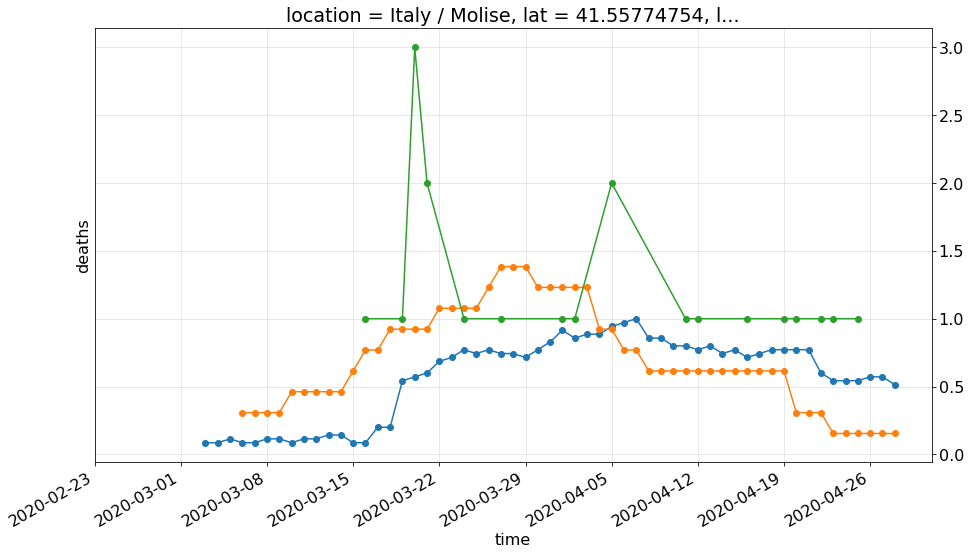

In [9]:
for region, fit_kinds in list(region_fits.items()):
    ds_region = ds_italy_regions.sel(location=f'Italy / {region}')
    
    _, ax = plt.subplots(1, subplot_kw={'xlim': XLIM})
    ax.set(yscale='log', ylim=(1, 30000)) 
    ax.set_title(f'COVID-19 {region}')
    ax.yaxis.tick_right()
    ax.yaxis.grid(color='lightgrey', linewidth=0.5)
    ax.xaxis.grid(color='lightgrey', linewidth=0.5)

    for (kind, fits), color in zip(fit_kinds.items(), PALETTE_ONE):
        label = LABEL[kind]
        covid19.plot.plot_data(ax, ds_region[kind], label=label, color=color, marker='o')
        for fit in fits:
            covid19.plot.plot(ax, ds_region[kind], fit, color=color, date_interval=7, add_diff=False)

    _, ax = plt.subplots(1, subplot_kw={'xlim': XLIM})
    ax.set_title(f'COVID-19 {region}')
    ax.yaxis.tick_right()
    ax.yaxis.grid(color='lightgrey', linewidth=0.5)
    ax.xaxis.grid(color='lightgrey', linewidth=0.5)

#    covid19.plot.plot_data(ax, data[region]['variazione_deaths_4'], label=label, kind='line', color=color, alpha=0.5)
    for (kind, fits), color in zip(fit_kinds.items(), PALETTE_ONE):
        ratio = RATIO[kind]
        label = LABEL[kind] + ('' if ratio == 1 else f' / {ratio}')
        if kind == 'deaths':
            d = ds_region[kind].diff(dim='time')
        else:
            d = ds_region[kind]
        covid19.plot.plot_data(ax, d / ratio, label=label, kind='line', marker='o', color=color)
        # for fit in fits:
        #     covid19.plot.plot(ax, data[region][kind] / ratio, fit.scale(1 / ratio), color=color, date_interval=7, add_diff=False)


In [32]:
print('## Initial exponential speed')
for region, fit_kinds in region_fits.items():
    if len(fit_kinds['deaths']):
        print(f'{region}:{" " * (14 - len(region))} {str(fit_kinds["deaths"][0])}')

## Initial exponential speed
Lombardia:      T_d=2.40 t_0='2020-02-18' r^2=0.997 start='2020-02-24' stop='2020-03-10'
Emilia-Romagna: T_d=3.19 t_0='2020-02-18' r^2=0.993 start='2020-03-01' stop='2020-03-22'
Piemonte:       T_d=2.62 t_0='2020-02-28' r^2=0.978 start='2020-03-07' stop='2020-03-23'
Veneto:         T_d=3.61 t_0='2020-02-22' r^2=0.992 start='2020-03-04' stop='2020-03-16'
Marche:         T_d=2.80 t_0='2020-02-28' r^2=0.999 start='2020-03-07' stop='2020-03-19'
Liguria:        T_d=2.74 t_0='2020-03-01' r^2=0.992 start='2020-03-08' stop='2020-03-24'
Toscana:        T_d=2.18 t_0='2020-03-07' r^2=0.991 start='2020-03-12' stop='2020-03-22'
Lazio:          T_d=3.66 t_0='2020-02-29' r^2=0.995 start='2020-03-09' stop='2020-03-24'
P.A. Trento:    T_d=2.49 t_0='2020-03-09' r^2=0.970 start='2020-03-15' stop='2020-03-24'
Campania:       T_d=3.20 t_0='2020-03-06' r^2=0.985 start='2020-03-14' stop='2020-03-29'
Puglia:         T_d=3.04 t_0='2020-03-04' r^2=0.950 start='2020-03-11' stop='2020